<a href="https://colab.research.google.com/github/tejaswini-meshram/Unsupervised-ML---Online-Retail-Customer-Segmentation/blob/main/Unsupervised_ML_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member** - Tejaswini Meshram

# **Project Summary -**

In this project,the task is to identify major customer segments on a transnational data set that contained one-year historical transactions for a UK-based online retail store. This would help the company segregate its customers based on transaction data and help them in marketing decisions and strategy.

After basic exploration and cleaning the data relationships between features in EDA was found and then jumped into the analysis part. RFM analysis helped us to identify the Platinum and Gold Customers who brings more profit for the Online retail stores as well helped to focus on Silver and Broze type of customer by organising some attractive offers for them.

I implemented various unsupervised machine learning algorithm such as KMeans Clustering, DBSCAN Algorithm, Hierarchical Clustering (Agglomerative Clustering). Here to find the Optimal number of clusters I used a Elbow Visulizers by Yellow bricks from Scikit Learn library. Also used Silhouette Score and Silhouette plot to visualize the clusters with different number of clusters. For Agglomerative Clustering, Dendogram to find the optimal number of clusters is used.

# **GitHub Link -**

GITHUB Link : https://github.com/tejaswini-meshram/Unsupervised-ML---Online-Retail-Customer-Segmentation

README File : https://github.com/tejaswini-meshram/Unsupervised-ML---Online-Retail-Customer-Segmentation/blob/main/README.md

# **Problem Statement**


In this project, the task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df=pd.read_csv("/content/drive/MyDrive/content/Online Retail.xlsx - Online Retail.csv")


### Dataset First View

In [ ]:
# Dataset First Look
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
shape=df.shape
print('rows = ',shape[0])
print('columns = ',shape[1])

rows =  541909
columns =  8


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

In [ ]:
#droping all the duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
#number of unique rows
df.shape[0]

536641

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

CustomerID     135037
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

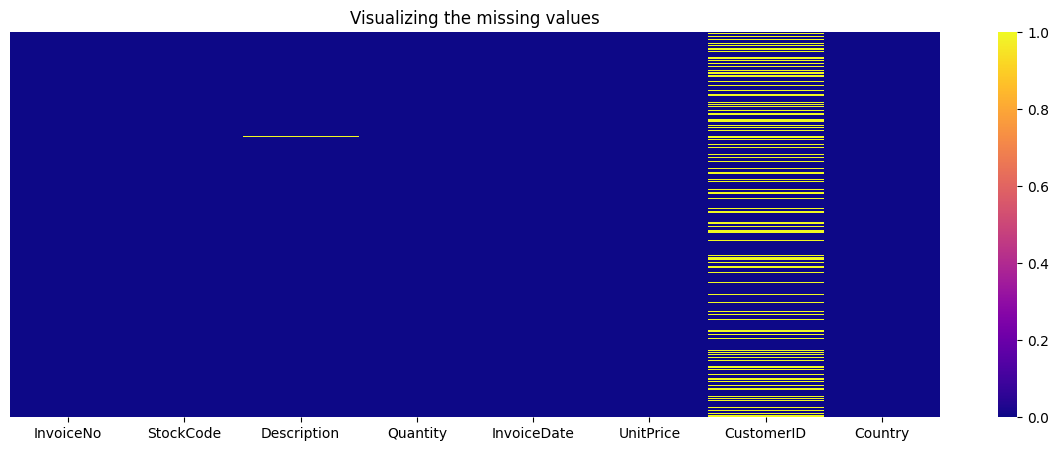

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title("Visualizing the missing values")
plt.show()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(401604, 8)

### What did you know about your dataset?

The Online Retail Dataset originally have 541909 rows and 8 columns out of which 5268 rows are duplicate.

Datatype of Invoice Date is object need to convert it into datetime.

CustomerID and Description have 135037 and 1454 missing values respectively. Customer ID is our identification feature so if it is not present then other details are of no use.

So after droping all the missing values, we have 401604 rows.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description


1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

3. Description: Product (item) name. Nominal.

4. Quantity: The quantities of each product (item) per transaction. Numeric.

5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.

7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8. Country: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.apply(lambda col: col.unique())

InvoiceNo      [536365, 536366, 536367, 536368, 536369, 53637...
StockCode      [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
Description    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
Quantity       [6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...
InvoiceDate    [12/1/10 8:26, 12/1/10 8:28, 12/1/10 8:34, 12/...
UnitPrice      [2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...
CustomerID     [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
Country        [United Kingdom, France, Australia, Netherland...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# quantity column has negative value which need to be removed
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [ ]:
# changing the datatype to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
# InvoiceNo starting with C are cancelled so droping them
df = df[-df['InvoiceNo'].str.contains('C')]

In [ ]:
df.shape[0]

392732

In [ ]:
# rows with unit price as 0
len(df[df['UnitPrice']==0])

40

In [ ]:
# droping the rows with unit price 0
df=df[df['UnitPrice']>0]
df.shape

(392692, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### What all manipulations have you done and insights you found?

As quantity of product cannot be negative therefore the rows with quntity value less than 0 are droped.

InvoiceNo starting with C are cancelled so they are also droped.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Top 10 items

top_10_products = df['Description'].value_counts().reset_index()
top_10_products =top_10_products.iloc[:10]

In [ ]:
top_10_products

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389
5,LUNCH BAG RED RETROSPOT,1303
6,SET OF 3 CAKE TINS PANTRY DESIGN,1152
7,POSTAGE,1099
8,LUNCH BAG BLACK SKULL.,1078
9,PACK OF 72 RETROSPOT CAKE CASES,1050


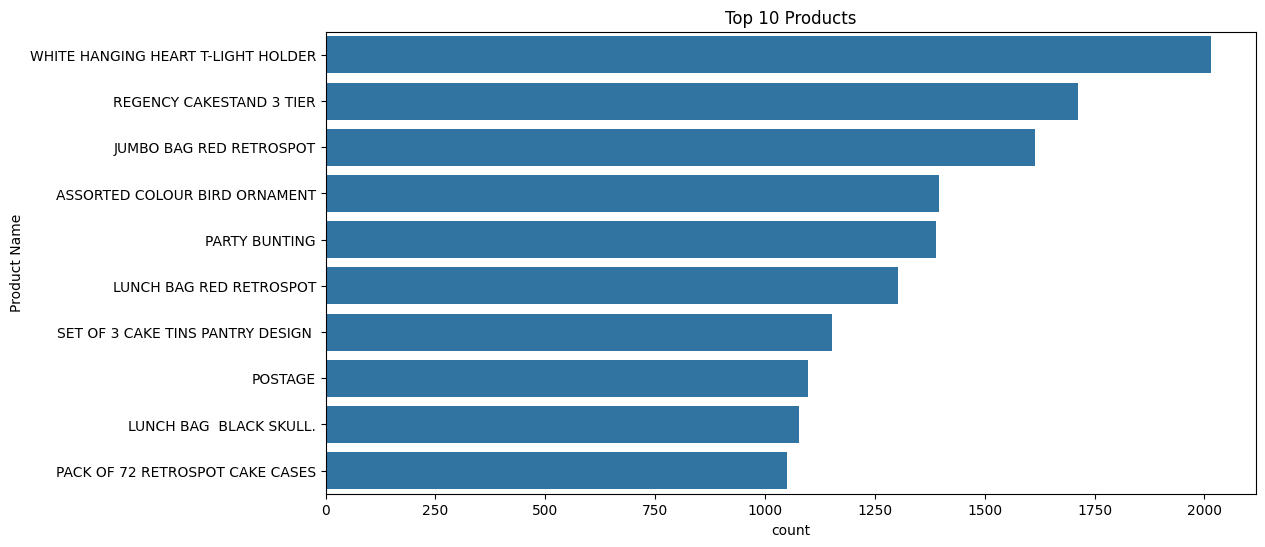

In [ ]:

plt.figure(figsize=(12,6))
sns.barplot(x =top_10_products['count'], y=top_10_products['Description'] )
plt.title('Top 10 Products')
plt.ylabel('Product Name')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used to represent the top 10 products as it becomes easy to perform a comparison of metric values across different product of data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say that WHITE HANGING HEART T-LIGHT HOLDER is most popular and to 10 products counts more than 1000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top selling products brings high revenue generation so more preference should be given to them.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#  10 least selling items

least_10_products = df['Description'].value_counts().reset_index()
least_10_products =least_10_products.tail(10)

In [ ]:
least_10_products

,Description,count
3867,CRACKED GLAZE EARRINGS BROWN,1
3868,LILAC FEATHERS CURTAIN,1
3869,JET BLACK LAS VEGAS BRACELET ROUND,1
3870,KNITTED RABBIT DOLL,1
3871,SET/6 IVORY BIRD T-LIGHT CANDLES,1
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


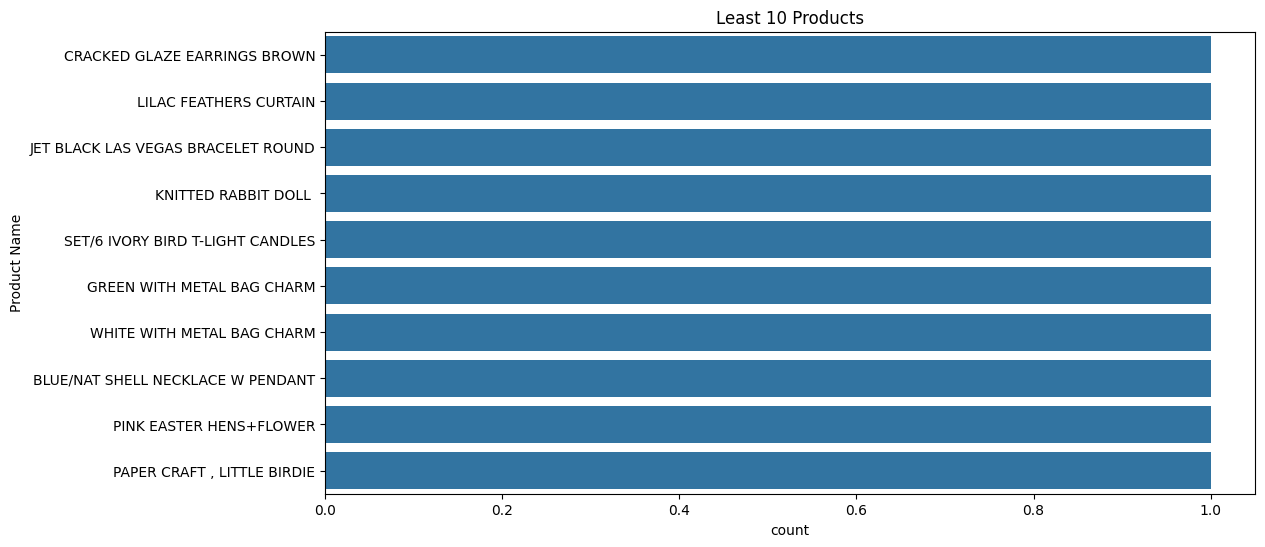

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x =least_10_products['count'], y=least_10_products['Description'] )
plt.title('Least 10 Products')
plt.ylabel('Product Name')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used to represent the least 10 products as it becomes easy to perform a comparison of metric values across different product of data.

##### 2. What is/are the insight(s) found from the chart?

From above graph we can say that least quantity ordered is 1 and listed are 10 least seld products.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strategic planning should involve a balanced approach, considering the potential of these least sold products.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#  top 10 stockcodes

top_10_stockcodes = df['StockCode'].value_counts().reset_index()
top_10_stockcodes =top_10_stockcodes.head(10)

In [ ]:
top_10_stockcodes

,StockCode,count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389
5,20725,1304
6,22720,1152
7,POST,1099
8,23203,1091
9,20727,1078


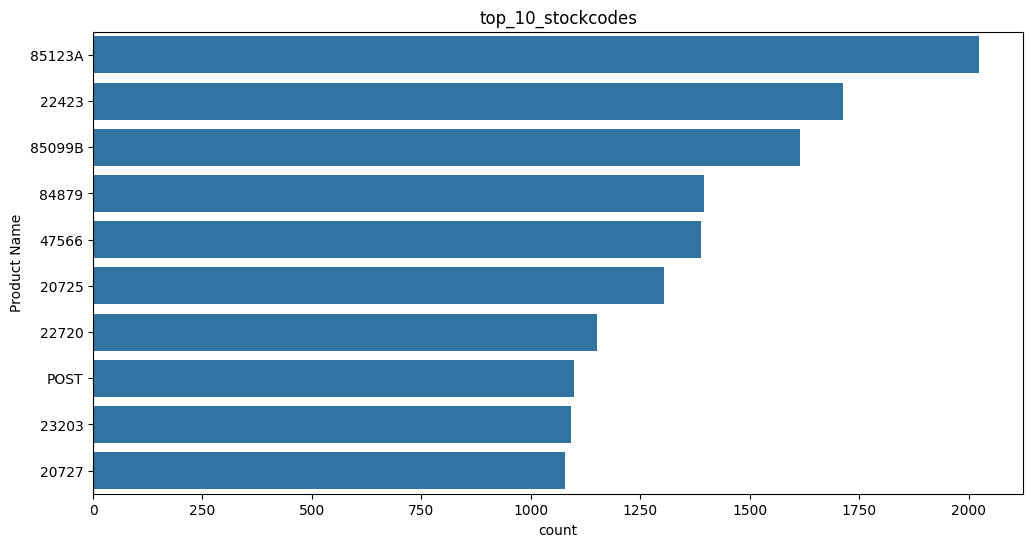

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x =top_10_stockcodes['count'], y=top_10_stockcodes['StockCode'] )
plt.title('top_10_stockcodes')
plt.ylabel('Product Name')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used to represent the top 10 products as it becomes easy to perform a comparison of metric values across different product of data.

##### 2. What is/are the insight(s) found from the chart?

StockCode-85123A is the first highest selling product.

StockCode-22423 is the second highest selling product.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top selling products with these StockCodes brings high revenue generation so more preference should be given to them.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#  top countries with most customers

top_countries = df['Country'].value_counts().reset_index()
top_countries =top_countries.head(5)

In [ ]:
top_countries


,Country,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


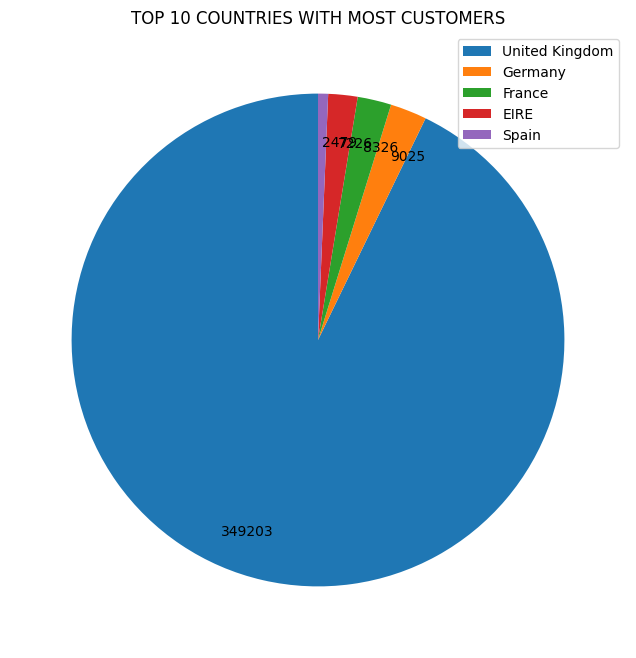

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(data=top_countries,x=top_countries.loc[:,'count'],startangle=90,labels='count',labeldistance=0.8)
plt.legend(top_countries.loc[:,'Country'])
plt.title("TOP 10 COUNTRIES WITH MOST CUSTOMERS",color='black')
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of top 10 counties with most customerss we use pie chart.Pie chart is the most suitable one as the pie chart visualizes the data distribution effectively and analysis becomes easier.

##### 2. What is/are the insight(s) found from the chart?

UK has highest number of customers.

Germany, France and IreLand has almost equal number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While having a large number of customers from a particular country (UK) is positive, over-dependency on specific markets may pose a risk. Economic or geopolitical changes in that country could impact travel patterns, leading to a potential downturn in business.

It's essential for businesses to be mindful of potential risks associated with market dependency and consider strategies for diversification and staying competitive in the long run.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
#  sales in different months

sales_in_month = df['month'].value_counts().reset_index()
sales_in_month

,month,count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


Text(0.5, 1.0, 'Sales count in Months')

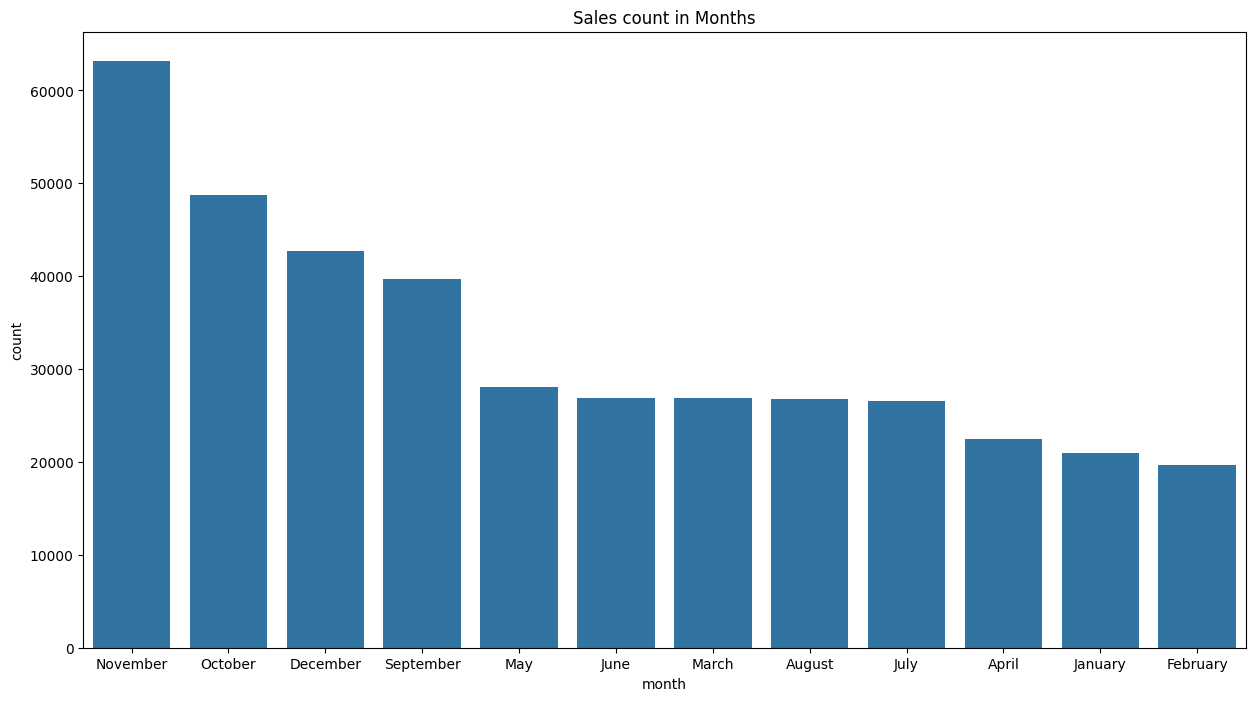

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=sales_in_month['month'], y=sales_in_month['count'])
plt.title("Sales count in Months")

##### 1. Why did you pick the specific chart?

Bar chart is used to represent the Sales count in Months as it becomes easy to perform a comparison of metric values across different product of data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say that November month has highest numnber of sales followed by October, December and September.
Other all months have more or less the same number of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As November Month has high sales, the inventaories should be managed and this month should be of high target to increase the revenue generation.

Also Strategic planning should involve a balanced approach, considering the potential of other months and work upon it.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#  sales on basis of days
sales_in_day = df['Day'].value_counts().reset_index()
sales_in_day


,Day,count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


Text(0.5, 1.0, 'Sales count on different Days')

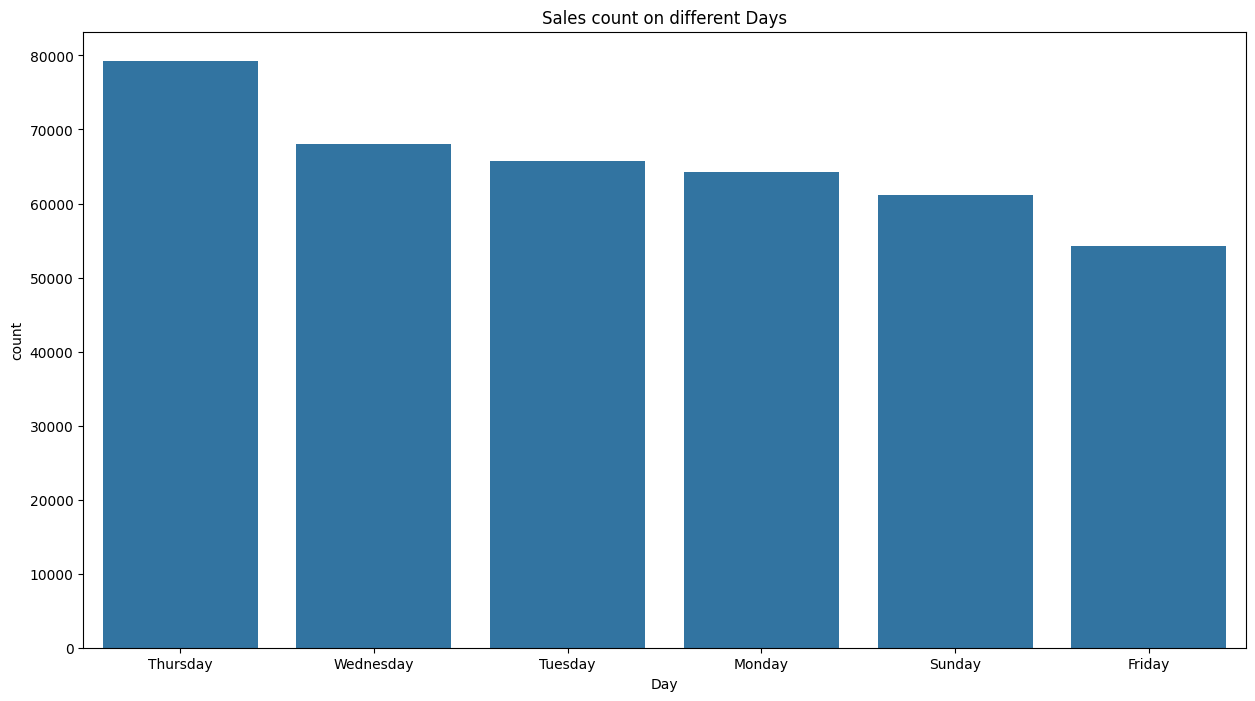

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=sales_in_day['Day'], y=sales_in_day['count'])
plt.title("Sales count on different Days")

##### 1. Why did you pick the specific chart?

Bar chart is used to represent the Sales count on different days as it becomes easy to perform a comparison of metric values across different product of data.

##### 2. What is/are the insight(s) found from the chart?

Sales on Thursdays are high and on Fridays are less compared to other days.

Other days have almost equal number of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As Thursdays has high sales, these days should be of high target to increase the revenue generation.

Also Strategic planning should involve a balanced approach, considering the potential of other days and work upon it.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# converting InvoiceDate datatype to datetime in format 01-01-2010 01:00
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])


In [ ]:
df["year"]= df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"]= df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"]= df["InvoiceDate"].apply(lambda x: x.day)
df["hour"]= df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"]= df["InvoiceDate"].apply(lambda x: x.minute)


In [ ]:
# extracting month from Invoice date
df["month"]=df["InvoiceDate"].dt.month_name()

In [ ]:
# extracting day from Invoice date
df["Day"]=df["InvoiceDate"].dt.day_name()

In [ ]:
df["TotalAmount"]=df["Quantity"]*df["UnitPrice"]

In [ ]:
    df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# RFM Model Analysis

rfm_df=df.copy()
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


In [ ]:
# Recency = Latest Date - Last Invoice Date,  Frequency = count of invoice no. of transactions, Monetary = Sum of Total Amount for each Costomer

import datetime as dt

# set latest date 2011-12-10 as last invoice date was 2011-12-09
Latest_Date= dt.datetime(2011,12,10)

#create RFM model score for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x:(Latest_Date-x.max()).days,
                                       'InvoiceNo': lambda x:len(x),
                                       'TotalAmount': lambda x: x.sum()})

#convert Invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#rename column names to Recency, Frequency, and Monetary
rfm_df.rename(columns = {'InvoiceDate':'Recency',  'InvoiceNo': 'Frequency',  'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
# Recency description
rfm_df.Recency.describe()


count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

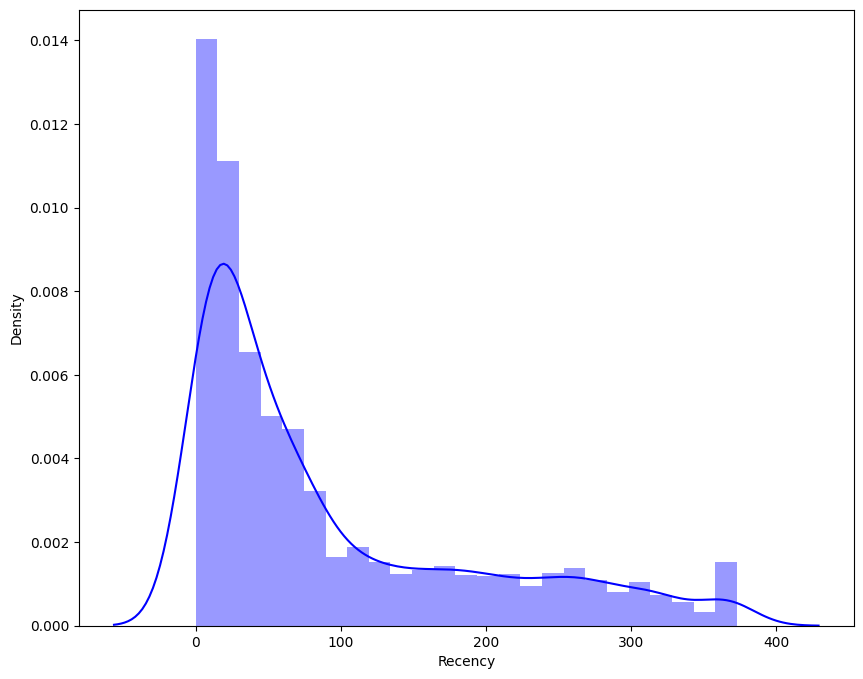

In [ ]:
# recency description plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='b')

In [ ]:
# frequency description
rfm_df.Frequency.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Density'>

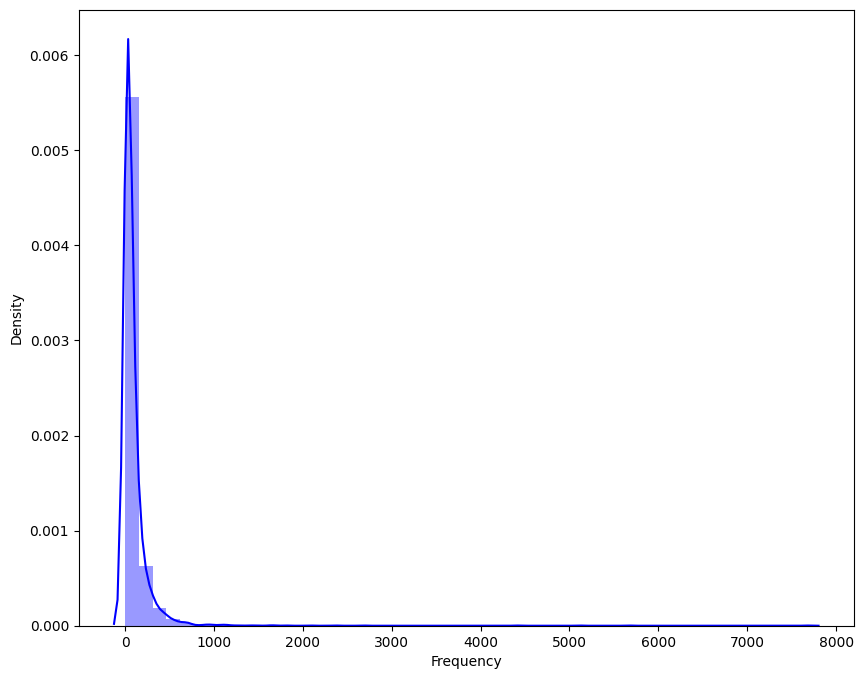

In [ ]:
# Frequency description plot
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='b')

In [ ]:
# monetary description
rfm_df.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

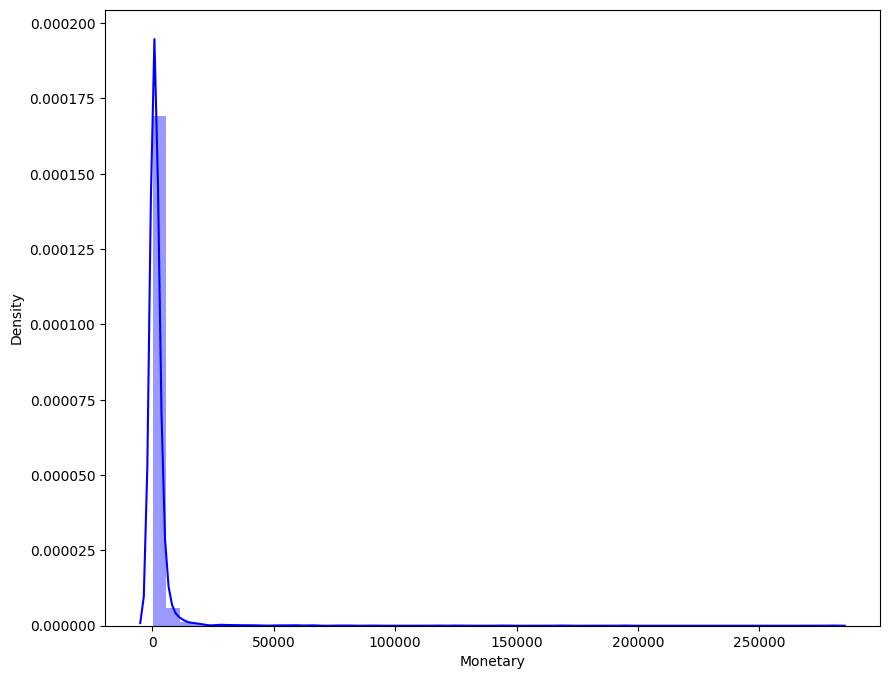

In [ ]:
# monetary description plot
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='b')

####Observation

From all the above graphs of Recency, Frequency and Monetary we can say that all are positively skewed distribution.

In [ ]:
# Split into four segments using quantiles
# Converting quantiles to a dictionary making it easy to use

quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

In [ ]:

#Function to create R, F and M segments
# arguments (x= value, p= recency,monetary_value,frequency,d=quartiles dict)
#lower the recency, good for the company

def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x<= d[p][0.50]:
    return 2
  elif x<= d[p][0.75]:
    return 3
  else:
    return 4


# arguments (x= value, p= recency, monetary_value, frequency, d=quartiles dict)
# higher value of frequency and monetary lead to a good customer.
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x<= d[p][0.50]:
    return 3
  elif x<= d[p][0.75]:
    return 2
  else:
    return 1


In [ ]:
# calculating and adding R, F and M segments values columns in the existing dataset to show R, F, M segments

rfm_df['R'] = rfm_df['Recency'].apply(RScoring,args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring,args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring,args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
# calculate and add RFM group value column showing combined concatenated score of RFM
rfm_df['RFM_Group'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#calculate and add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis = 1)

rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [ ]:
rfm_df['RFM_Score'].unique()


array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [ ]:
# assign loyalty_Level to each customer

Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronz']
Score_cut = pd.qcut(rfm_df['RFM_Score'], q=4, labels = Loyalty_Level)
rfm_df['RFM_Loyalty_Level'] = Score_cut.values
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronz


In [ ]:
#validate the data for RFM group = 111

rfm_df[rfm_df['RFM_Group']=='111'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,336,194390.79,1,1,1,111,3,Platinum
3,14911.0,1,5670,143711.17,1,1,1,111,3,Platinum
4,14156.0,9,1395,117210.08,1,1,1,111,3,Platinum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
9,15311.0,0,2366,60632.75,1,1,1,111,3,Platinum


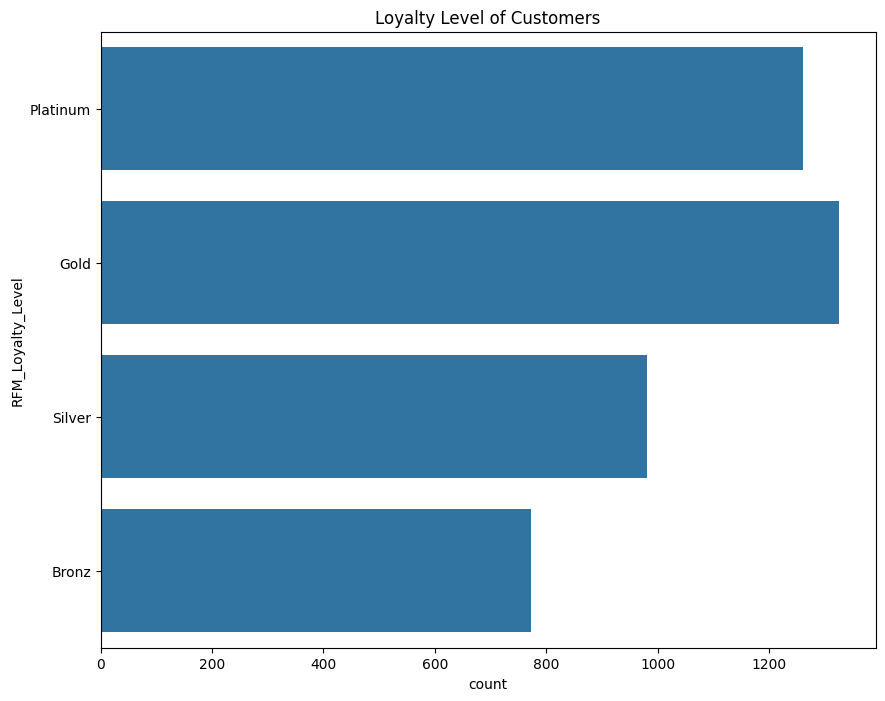

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(rfm_df['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

<Axes: xlabel='Recency', ylabel='Density'>

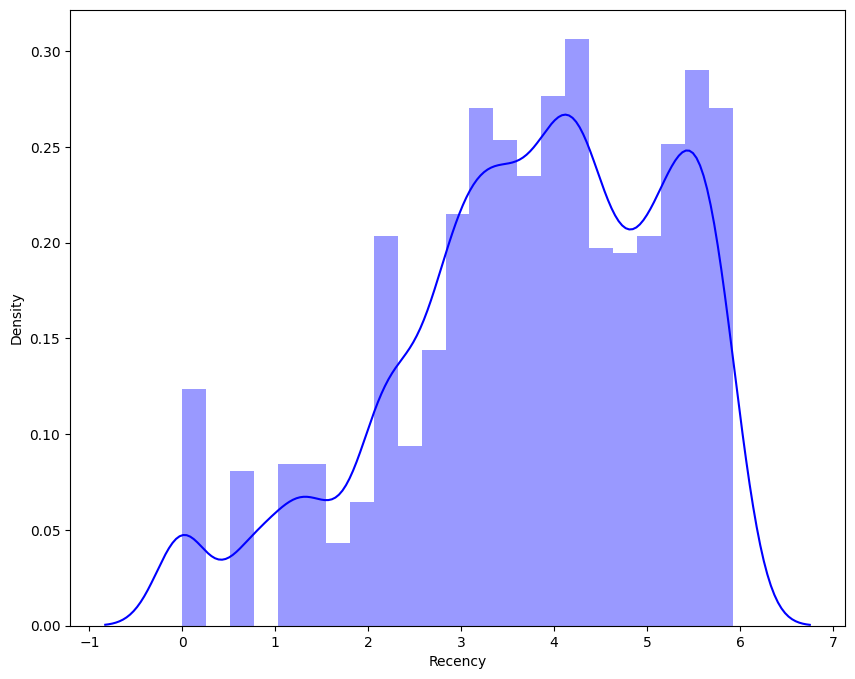

In [ ]:
#Handling negative and zero values so as to handle infinite numbers during log transformation

def handle_neg_n_zero(num):
  if num <= 0:
    return 1
  else:
    return num

#Applying handle_neg_n_zero function to Recency and Monetary columns

rfm_df [ 'Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df [ 'Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df [['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color = 'b')

<Axes: xlabel='Frequency', ylabel='Density'>

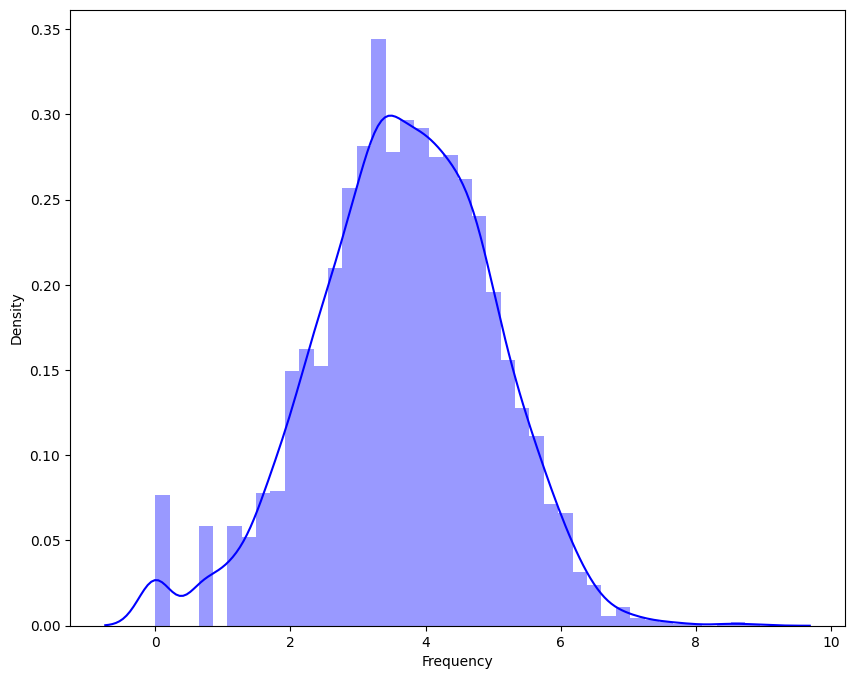

In [ ]:
# data distribution after data normalization for frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 100')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot, color= 'b')

In [ ]:
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)

rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)

rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
rfm_df

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Bronz,5.624018,2.302585,5.196285
18281.0,180,7,80.82,4,4,4,444,12,Bronz,5.192957,1.945910,4.392224
18282.0,7,12,178.05,1,4,4,144,9,Silver,1.945910,2.484907,5.182064


### K Mean Clustering   (Elbow method)



In [ ]:
# Importing libraries necessary for clustering

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
!pip install yellowbrick

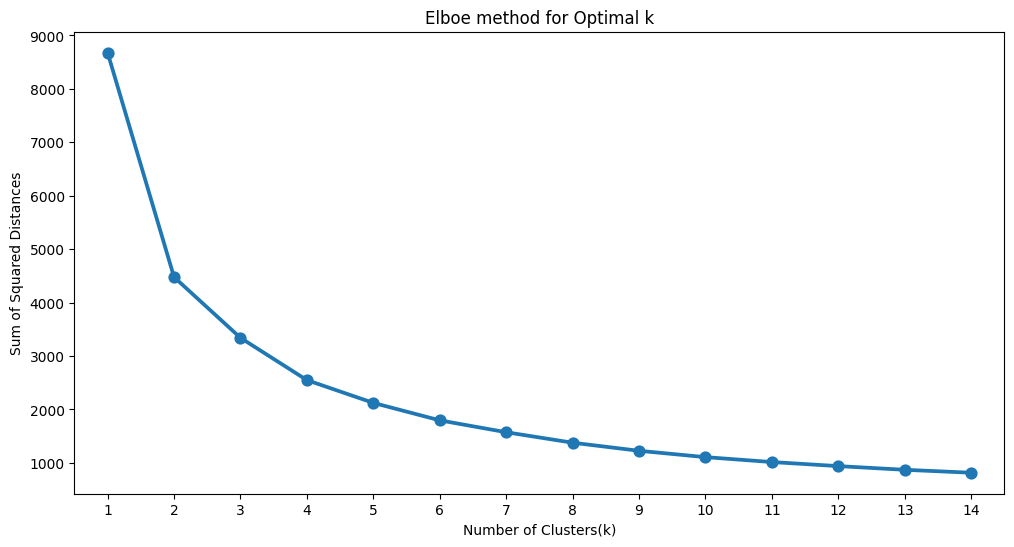

In [ ]:
# applying Elbow method an Recency and Monetary

# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log', 'Monetary_log']

# taking only values of recency and monetory in X.
X= rfm_df[Recency_and_Monetary_feat].values

# standardising the data
scaler= StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method

wcss = {}

for k in range(1,15):
  km = KMeans (n_clusters= k, init ='k-means++', max_iter= 1000)
  km=km.fit(X)
  wcss[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x=list(wcss.keys()),y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel("Sum of Squared Distances")
plt.title('Elboe method for Optimal k')
plt.show()

Here we can see that optimal value for cluster came out to be 2.

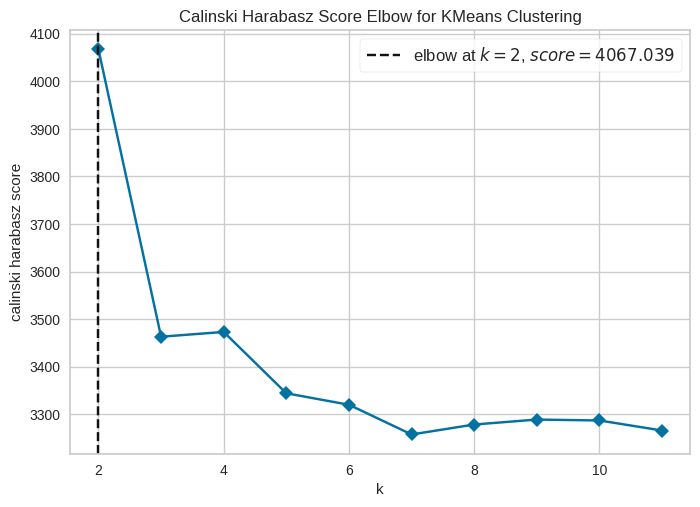

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

model =KMeans()

visualizer =KElbowVisualizer( model, k=(2,12), metric='calinski_harabasz', timings=False )

visualizer.fit(X)  # Fit the data to the visualizer

visualizer.show()  #Finalize and render the figure

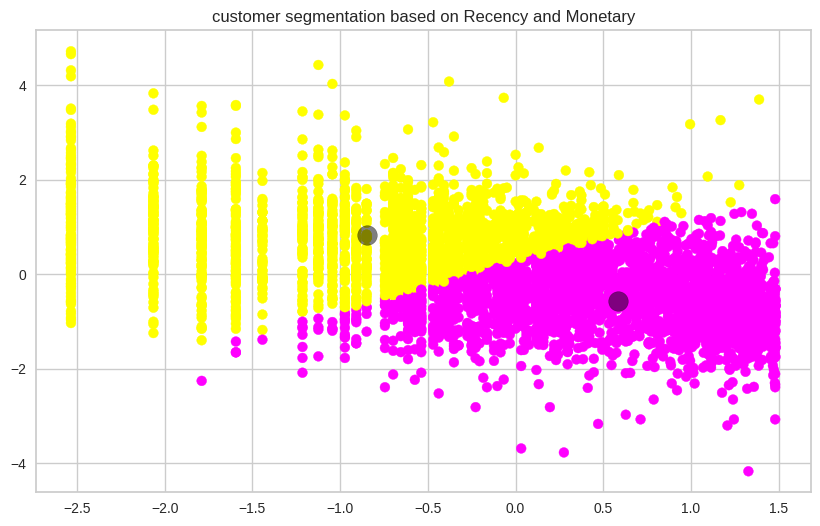

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

plt.figure(figsize=(10,6))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='spring_r')

centres= kmeans.cluster_centers_
plt.scatter(centres[:,0],centres[:,1], c='black', s=200, alpha=0.5)

### Silhouette Score

In [ ]:
# validating above optimal cluster value (i.e. optimal_cluster=2)
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log', 'Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_df[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=1)
  preds =clusterer.fit_predict(X)
  centers= clusterer.cluster_centers_

  score =silhouette_score(X, preds)
  print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42071509151962466
For n_clusters = 3, silhouette score is 0.3437518298668814
For n_clusters = 4, silhouette score is 0.3650974991418327
For n_clusters = 5, silhouette score is 0.3373665724507179
For n_clusters = 6, silhouette score is 0.3443885046541216
For n_clusters = 7, silhouette score is 0.3472199263658509
For n_clusters = 8, silhouette score is 0.3381068780177306
For n_clusters = 9, silhouette score is 0.34684281085994795
For n_clusters = 10, silhouette score is 0.3484734757533709
For n_clusters = 11, silhouette score is 0.3378817580922461
For n_clusters = 12, silhouette score is 0.3400804363390772
For n_clusters = 13, silhouette score is 0.34062857355032594
For n_clusters = 14, silhouette score is 0.3474546335493066
For n_clusters = 15, silhouette score is 0.3429807211268803


####Observation
Here we can see the for n_cluster=2 silhouette score is good as compared to others. (if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)

In [ ]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is 0.39559432494517566
For n_clusters = 3 The average silhouette_score is 0.3058876637738773
For n_clusters = 4 The average silhouette_score is 0.3028850229495839
For n_clusters = 5 The average silhouette_score is 0.2792649772843255
For n_clusters = 6 The average silhouette_score is 0.27928761515967193
For n_clusters = 7 The average silhouette_score is 0.2682462889803735
For n_clusters = 8 The average silhouette_score is 0.2642066237713513
For n_clusters = 9 The average silhouette_score is 0.25352442378461204
For n_clusters = 10 The average silhouette_score is 0.2648431840242154


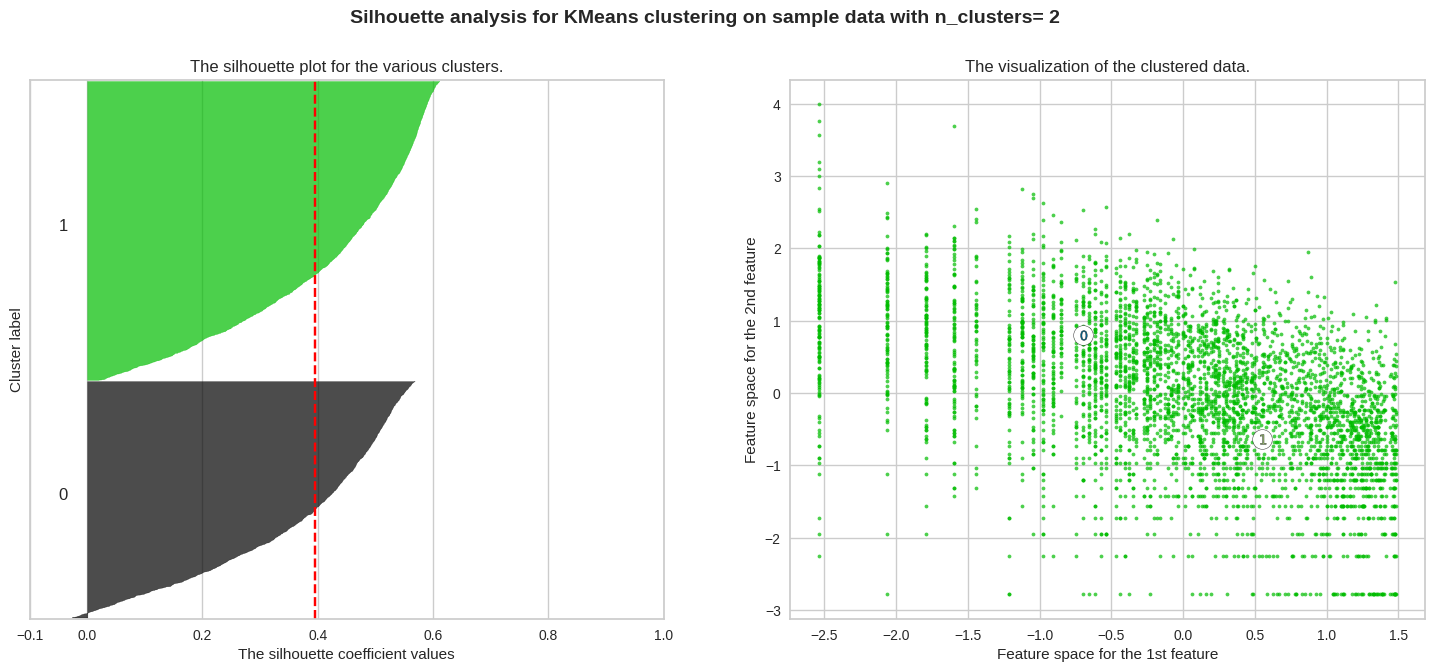

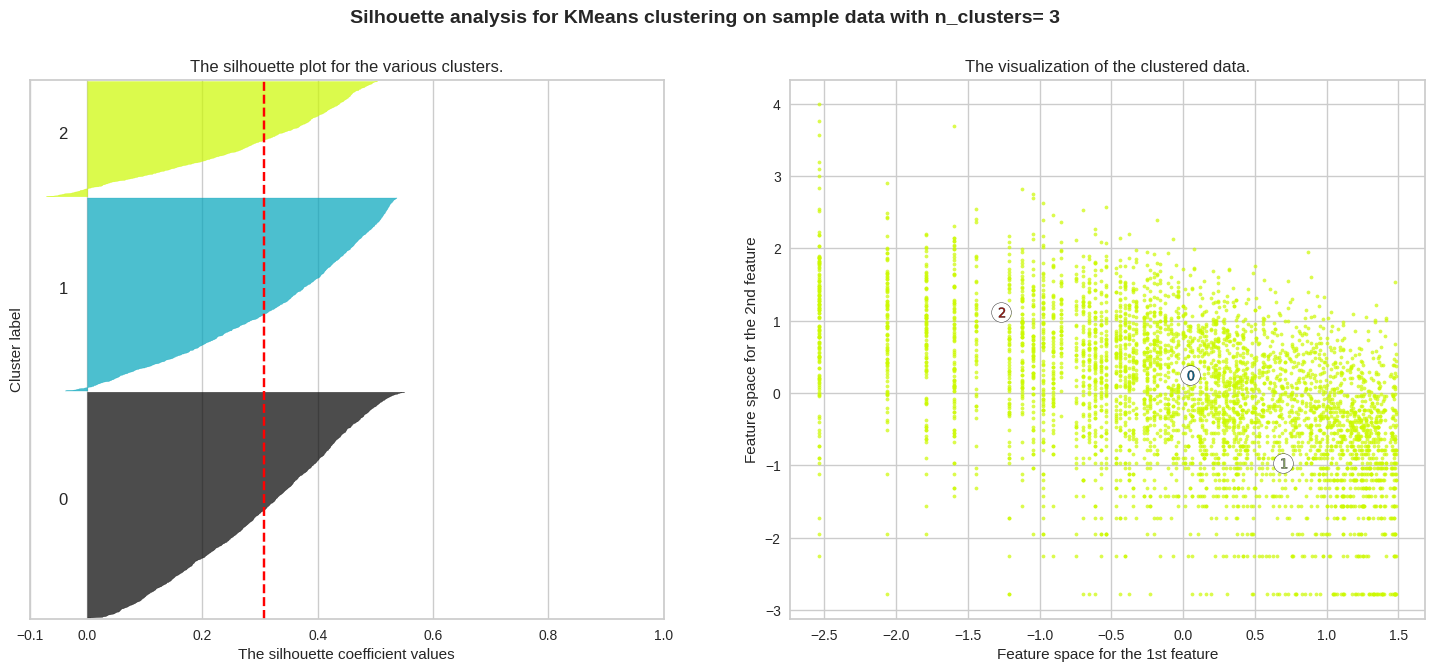

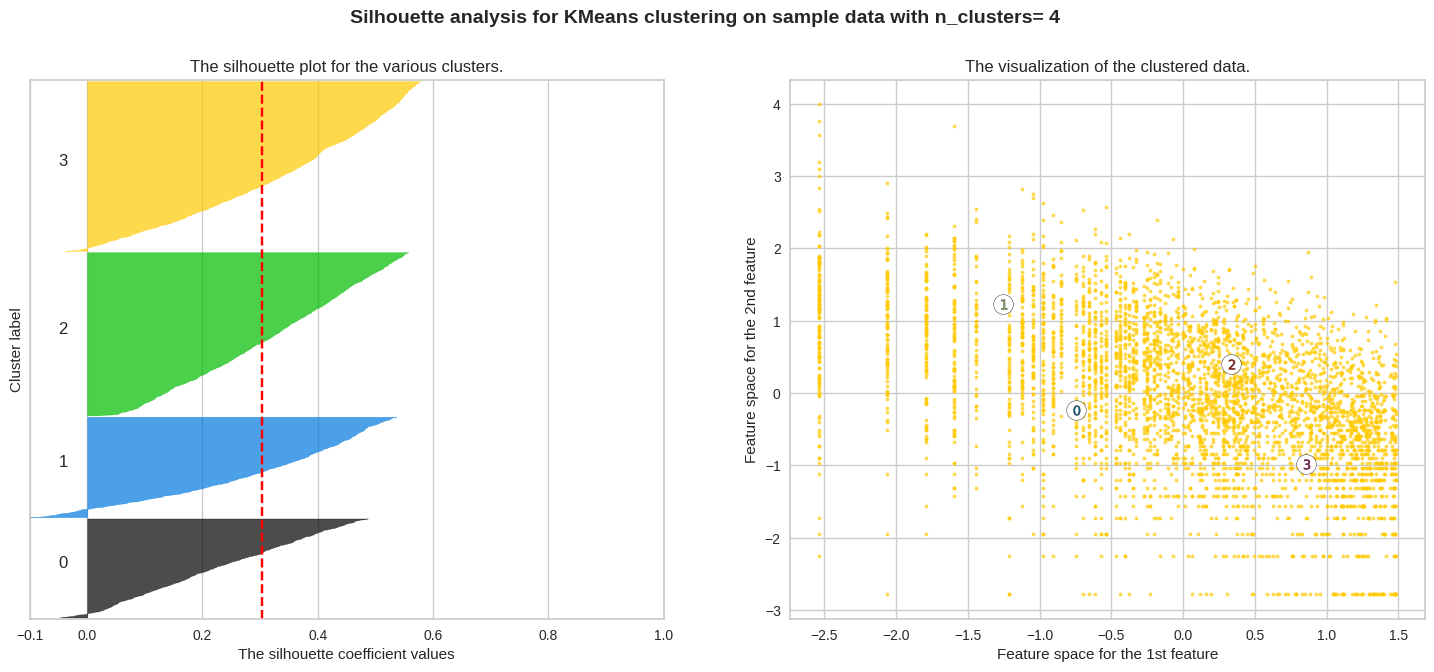

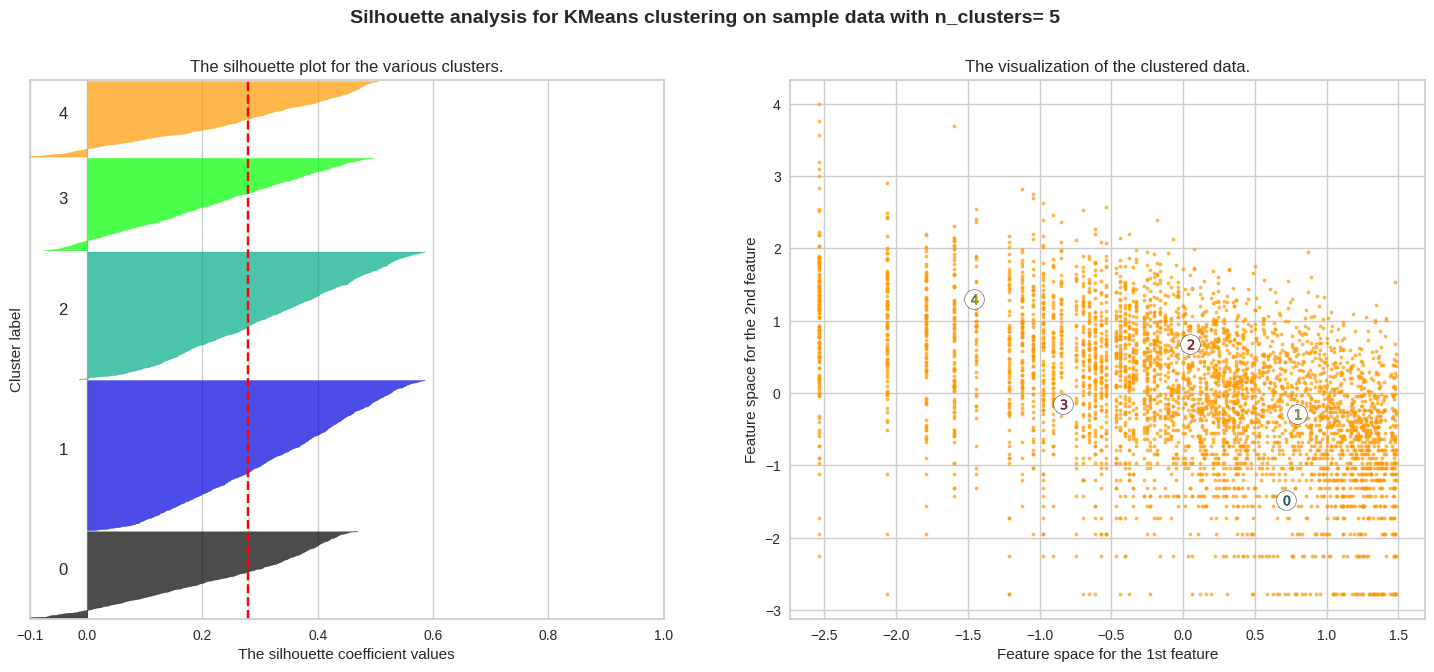

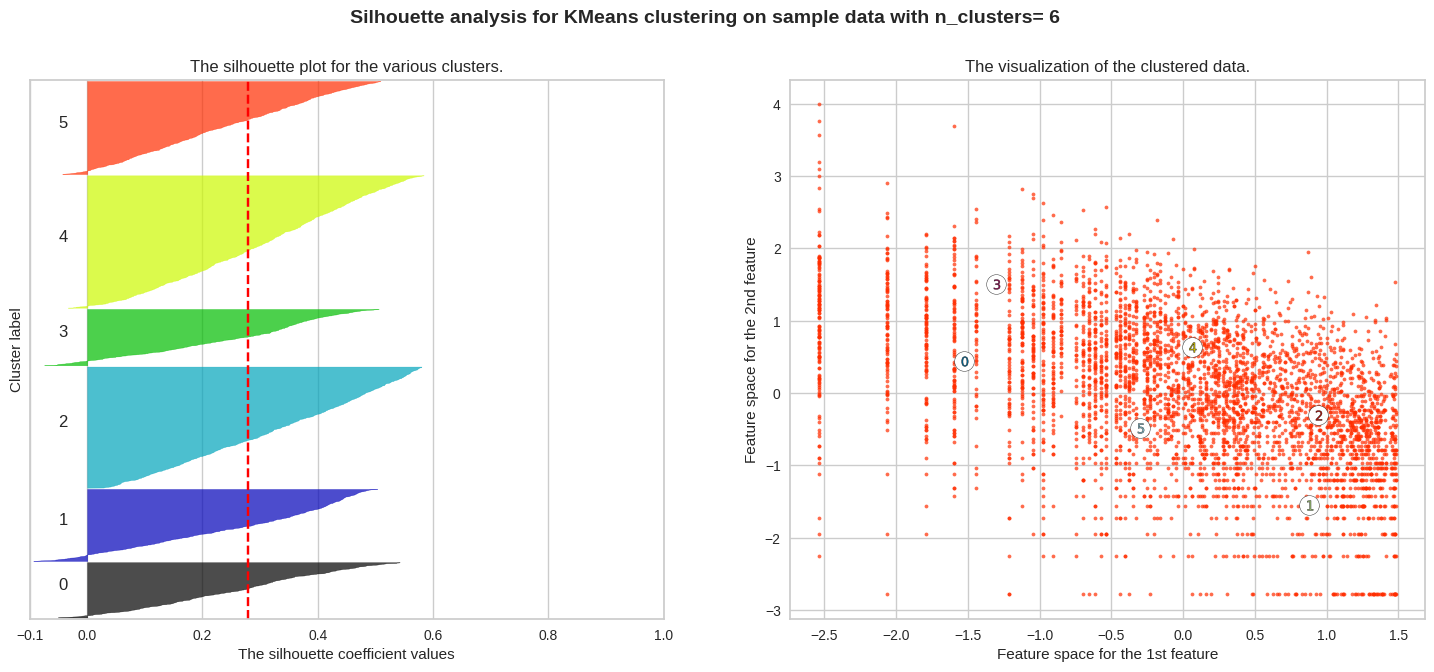

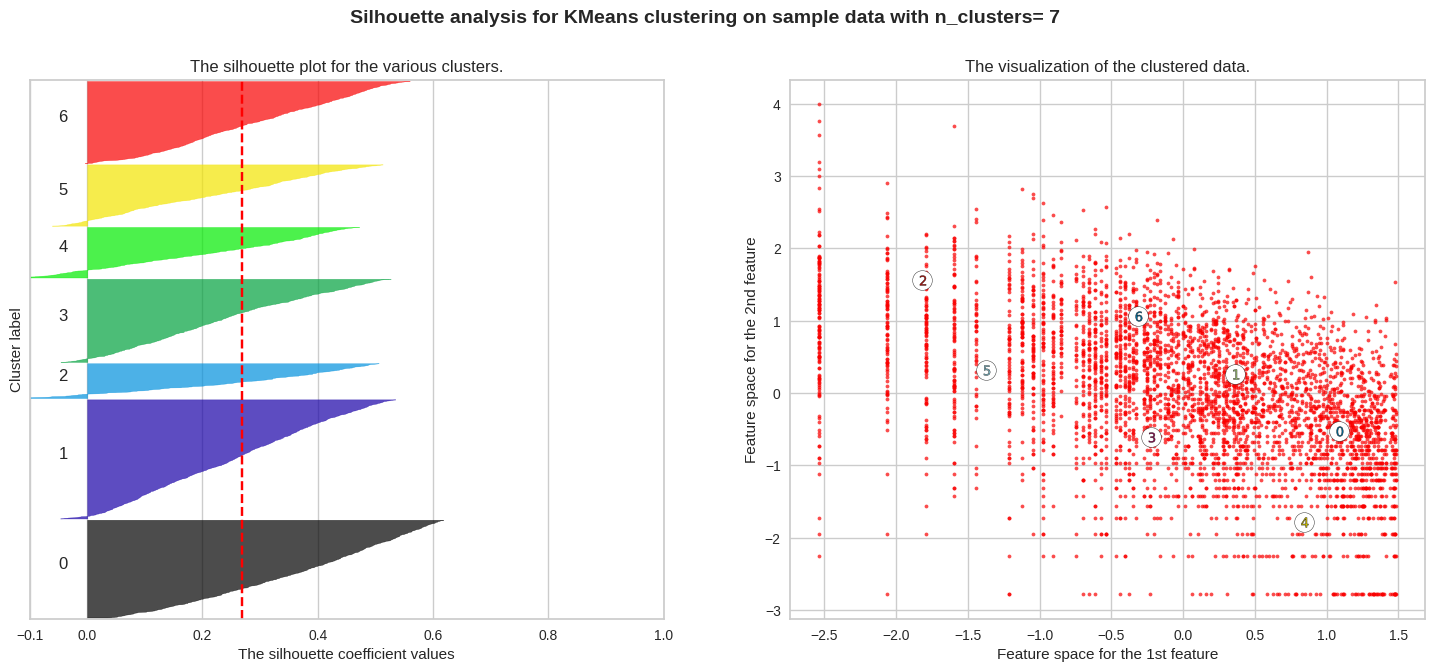

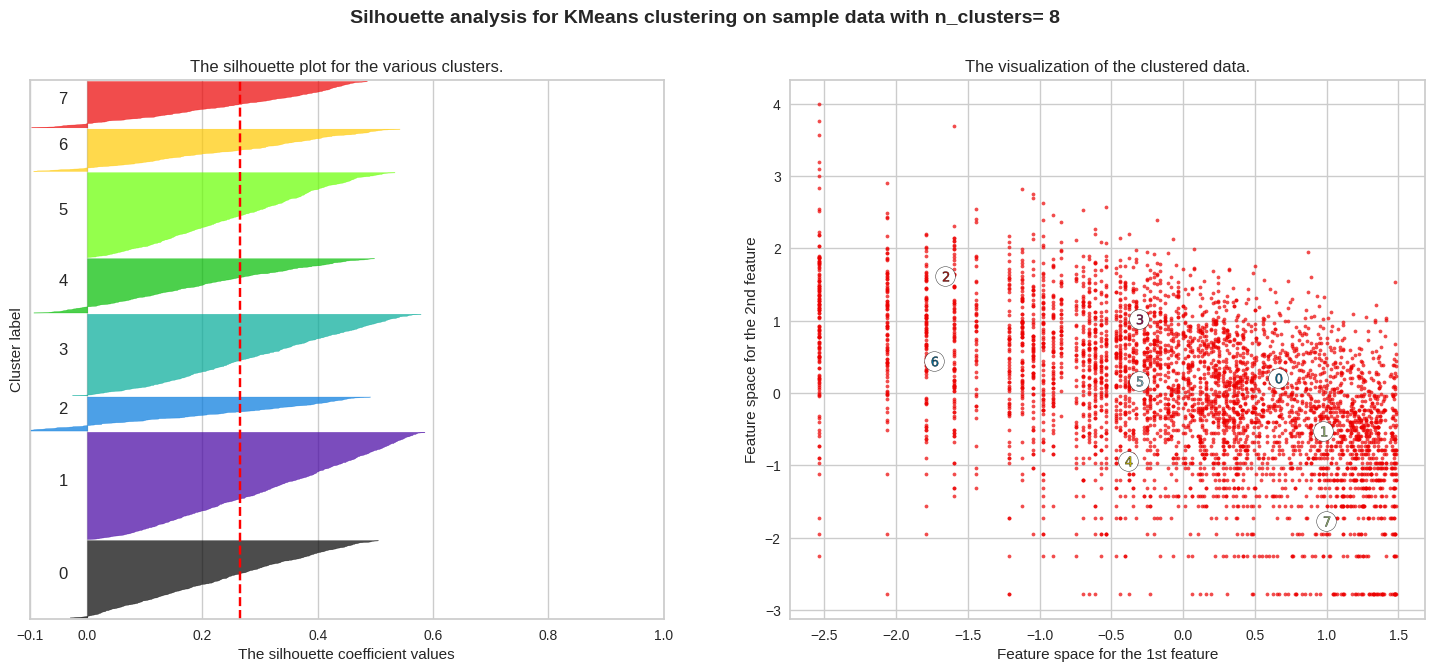

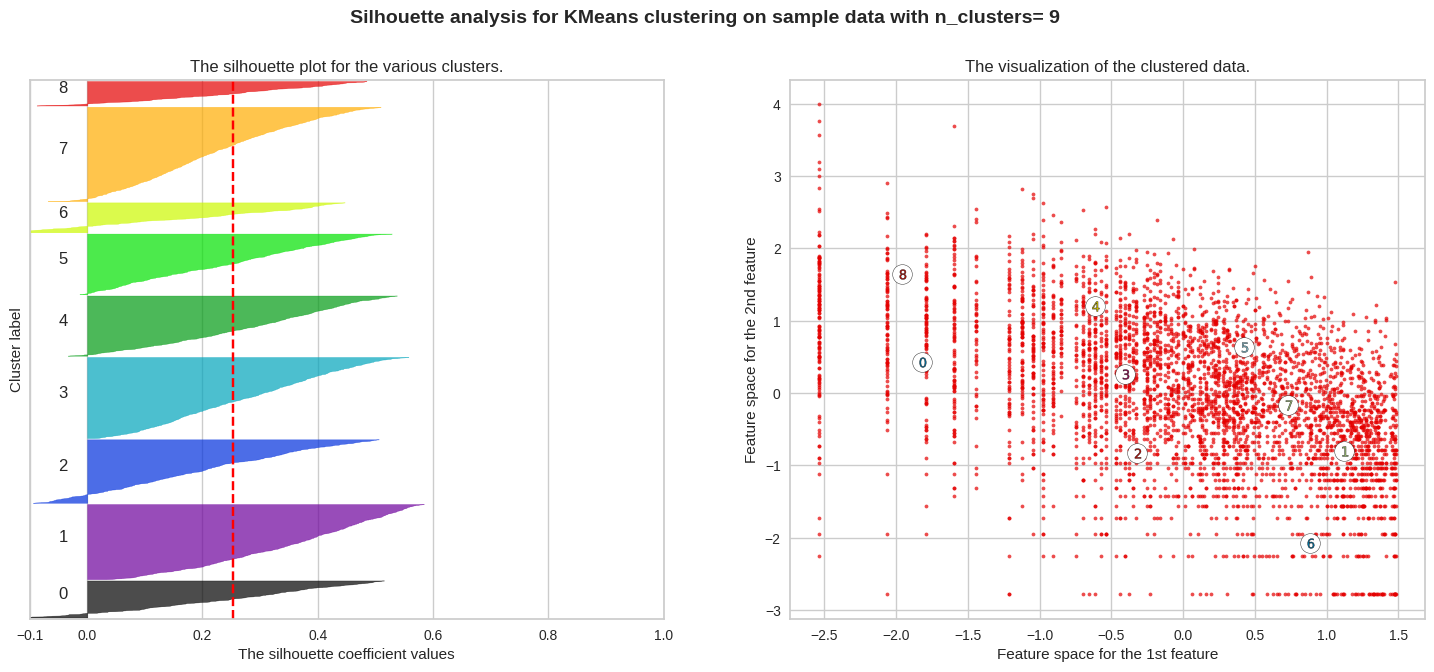

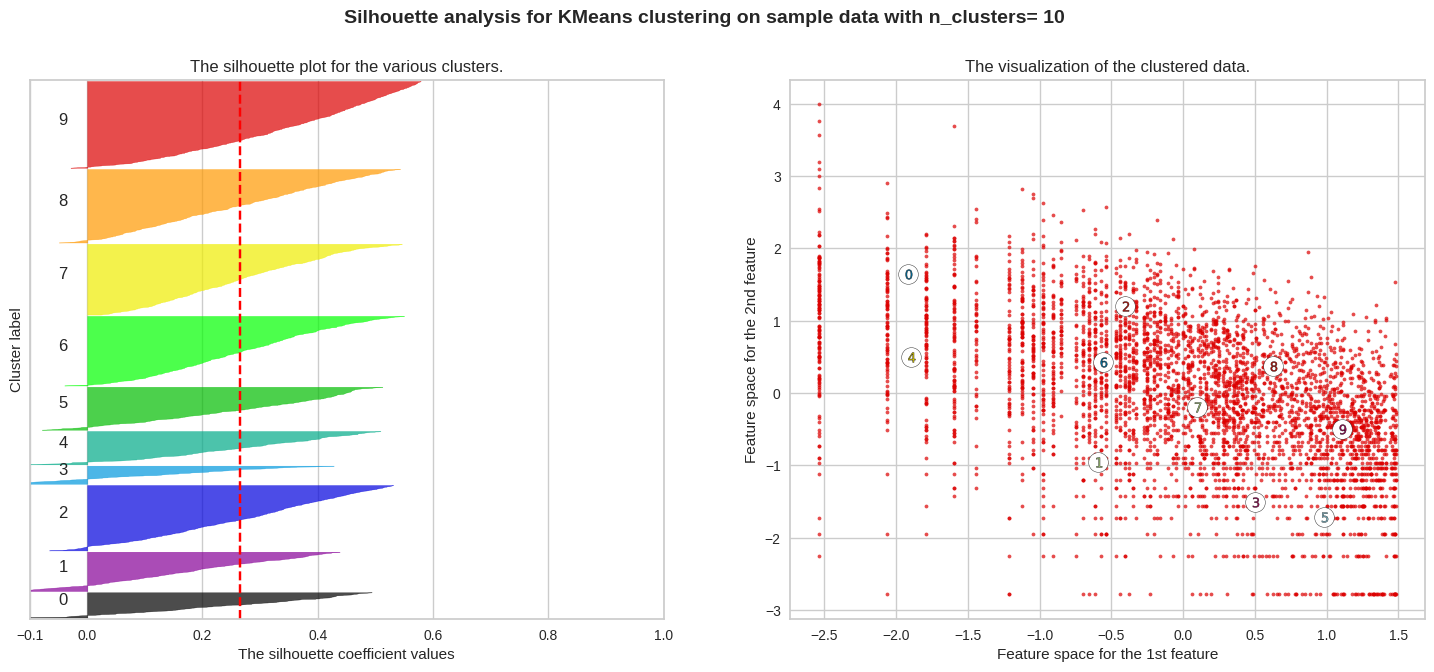

In [ ]:
X_features = rfm_df[['Recency_log',	'Frequency_log',	'Monetary_log']].values
saler= preprocessing.StandardScaler()
X= saler.fit_transform(X_features)

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
  # Create a subplot with 1 row and 2 columns
  fig , (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches (18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from 1, 1 but in this example all lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])

  # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.

  clusterer =KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters

  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples (X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    #Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
       sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color,alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower+ 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks ([]) # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  #2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype (float) /n_clusters)
  ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=color, edgecolor='k')

  #Labeling the clusters
  centers= clusterer.cluster_centers_
  #Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data " "with n_clusters= %d" % n_clusters), fontsize =14, fontweight= 'bold')

plt.show()


####Observation

From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.

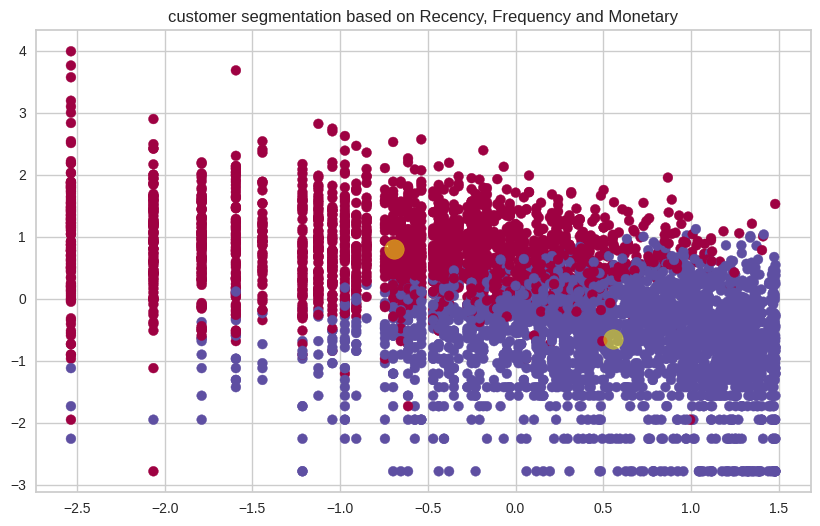

In [ ]:
#Cluster by Recency, Frequency and Monetary
# KMeans with 2 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_kmeans= kmeans.predict(X)

#plotting figure

plt.figure(figsize=(10,6))

plt.title('customer segmentation based on Recency, Frequency and Monetary')

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers =kmeans.cluster_centers_

plt.scatter(centers [:, 0], centers [:, 1], c='yellow', s=200, alpha=0.5);

###Applying DBSCAN to Recency, Frequency and Monetary



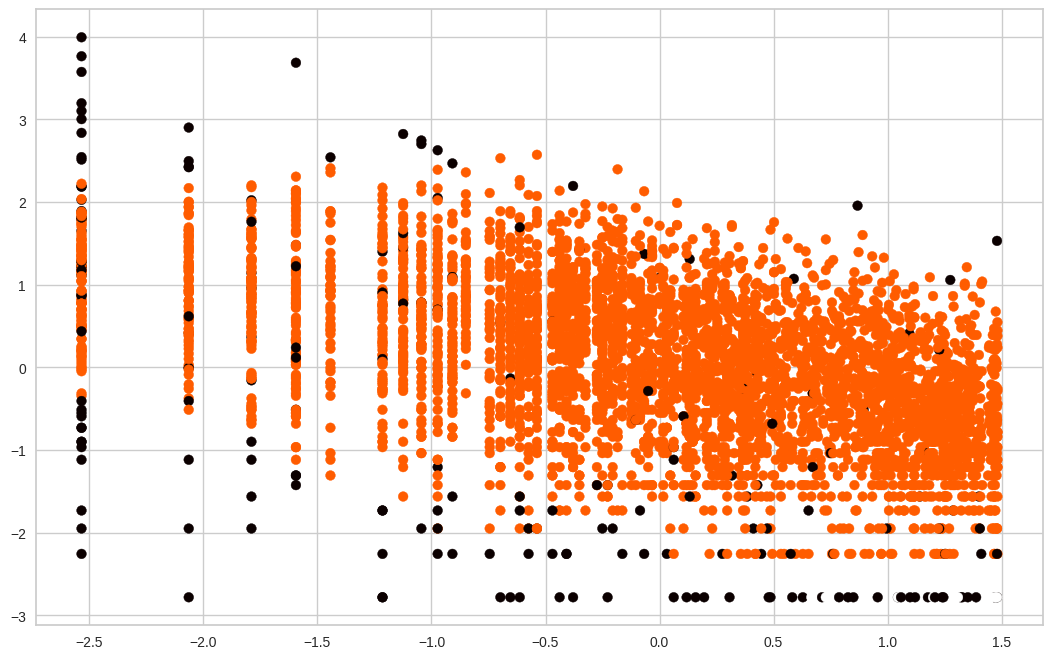

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)

plt.figure(figsize=(13,8))

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='hot');

### Observtion

Here we can see that, Customers are well seperated when we cluster them by Recency, Frequency and Monetary and opyimal number of cluster is equal to 3.

In [ ]:
#Performing K-Means Clustering with 2 clusters

KMean_clust = KMeans(n_clusters= 2, init ='k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset

rfm_df ['Cluster'] = KMean_clust.labels_

#First 10 rows of the RFM dataframe

rfm_df.head (10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,0
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,1
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,0
12352.0,36,85,2506.04,2,2,1,221,5,Platinum,3.583519,4.442651,7.826459,1
12353.0,204,4,89.00,4,4,4,444,12,Bronz,5.318120,1.386294,4.488636,0
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,0
12355.0,214,13,459.40,4,4,3,443,11,Bronz,5.365976,2.564949,6.129921,0


In [ ]:
#checking customer belongs to cluster 1
rfm_df[rfm_df['Cluster']==1]

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,1
12352.0,36,85,2506.04,2,2,1,221,5,Platinum,3.583519,4.442651,7.826459,1
12356.0,22,59,2811.43,2,2,1,221,5,Platinum,3.091042,4.077537,7.941449,1
12357.0,33,131,6207.67,2,1,1,211,4,Platinum,3.496508,4.875197,8.733541,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260.0,172,133,2628.35,4,1,1,411,6,Gold,5.147494,4.890349,7.874112,1
18263.0,25,61,1213.16,2,2,2,222,6,Gold,3.218876,4.110874,7.100984,1
18272.0,2,166,3078.58,1,1,1,111,3,Platinum,0.693147,5.111988,8.032224,1


###Herarchical Clustering

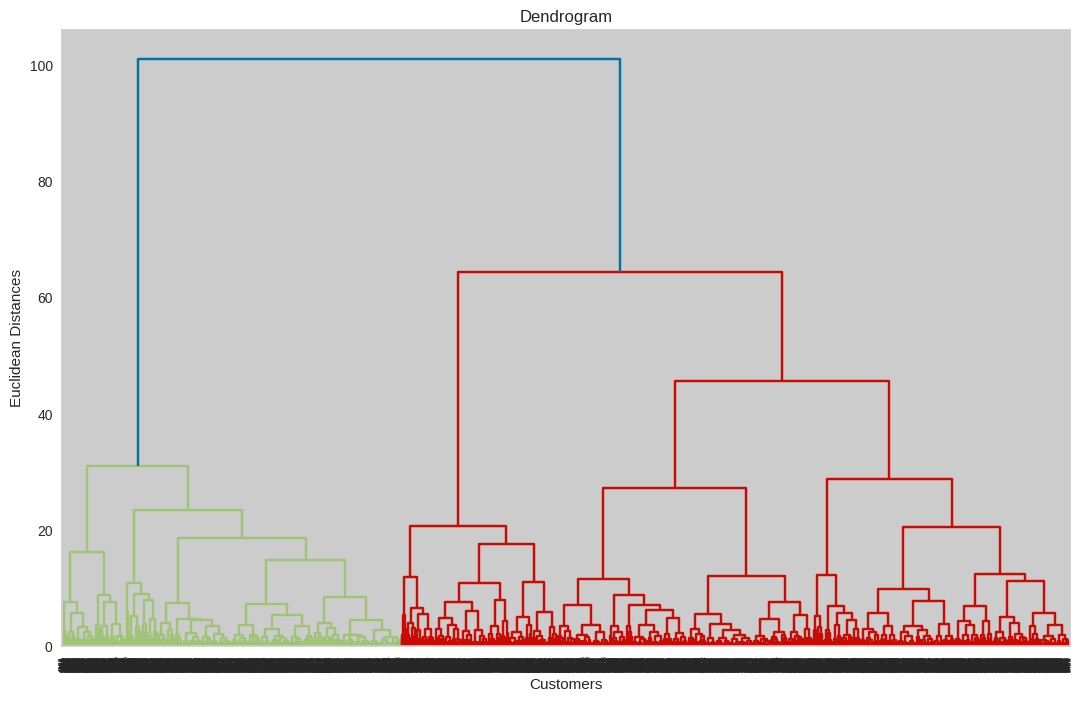

In [ ]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library

import scipy.cluster.hierarchy as sch

# Creating a dendrogram to visualize the clusters

plt.figure(figsize=(13,8))

dendrogram = sch.dendrogram (sch.linkage (X, method = 'ward'))

plt.title('Dendrogram')

plt.xlabel('Customers')

plt.ylabel('Euclidean Distances')

plt.show()

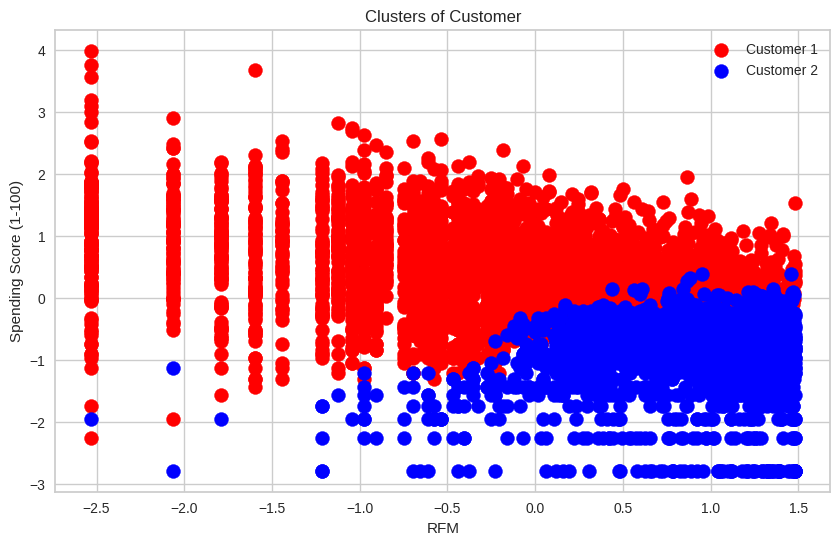

In [ ]:
# fitting hierarchical clustering

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering (n_clusters = 2, affinity = 'euclidean',

linkage = 'ward')

y_hc = hc.fit_predict(X)

# Visualizing the clusters (two dimensions only)

plt.figure(figsize=(10,6))

plt.scatter (X[y_hc == 0, 0], X [y_hc == 0, 1], s = 100, c = 'red',

label = 'Customer 1')

plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')

plt.legend()

plt.show()

In [ ]:
# let's check mean values of the cluster for recency, frequeny and monetary
rfm_df.groupby('Cluster').agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':'mean'})

,Recency,Frequency,Monetary
Cluster,,,
0,140.406982,25.092402,473.429274
1,30.214398,174.246978,4064.324021


###Observation
We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in comapny's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.

###Summary

In [ ]:
from prettytable import PrettyTable

#Specify the column Names while initializing the Table
myTable = PrettyTable(['Sr No.',"Model_Name", 'Data', "Optimal_Number_of_cluster"])

#Add rows

myTable.add_row(['1', "K-Means with silhouette_score", "RM", "2"])

myTable.add_row(['2', "K-Means with Elbow methos ", "RM", "2"])

myTable.add_row(['3', "DBSCAN", "RM", "2"])

myTable.add_row(['4', "K-Means with silhouette_score", "FM", "2"])

myTable.add_row(['5', "K-Means with Elbow methos ", "FM", "2"])

myTable.add_row(['6', "DBSCAN", "FM", "2"])

myTable.add_row(['7', "K-Means with silhouette_score", "RFM", "2"])

myTable.add_row(['8', "K-Means with Elbow methos", "RFM", "2"])


print(myTable)

+--------+-------------------------------+------+---------------------------+
| Sr No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score |  RM  |             2             |
|   2    |   K-Means with Elbow methos   |  RM  |             2             |
|   3    |             DBSCAN            |  RM  |             2             |
|   4    | K-Means with silhouette_score |  FM  |             2             |
|   5    |   K-Means with Elbow methos   |  FM  |             2             |
|   6    |             DBSCAN            |  FM  |             2             |
|   7    | K-Means with silhouette_score | RFM  |             2             |
|   8    |   K-Means with Elbow methos   | RFM  |             2             |
+--------+-------------------------------+------+---------------------------+


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In unsupervised machine learning, especially for tasks like online retail customer segmentation, the evaluation metrics are crucial in determining the quality and business impact of the segmentation. Here are some commonly considered evaluation metrics and their importance:

1. Silhouette Score:

The silhouette score measures how similar an object is to its own cluster compared to other clusters. A high silhouette score indicates that the clusters are well-defined, and customers within the same cluster are similar while being distinct from those in other clusters. This helps ensure that the segments are meaningful and can lead to better-targeted marketing strategies.

2. Within-Cluster Sum of Squares (WCSS):

WCSS measures the sum of squared distances between each point and the centroid of its cluster. Minimizing WCSS leads to more compact clusters, which can be crucial for identifying homogeneous customer segments that can be effectively targeted.

3. Cluster Size and Distribution:

Evaluating the size and distribution of clusters ensures that segments are balanced and actionable. If clusters are too small, they may not be significant for business strategies. Conversely, very large clusters might be too heterogeneous, reducing the precision of targeted marketing efforts.

Using these metrics, the objective is to create customer segments that are not only statistically sound but also translate into positive business outcomes, such as improved customer targeting, personalized marketing strategies, and increased customer satisfaction and loyalty.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The elbow method was chosen as the final prediction model for the unsupervised machine learning task of online retail customer segmentation because it effectively balances simplicity and performance. By plotting the explained variance against the number of clusters, the elbow method helps identify the point where adding more clusters yields diminishing returns. This point, known as the "elbow," provides a practical and intuitive way to select an optimal number of clusters, ensuring that the model remains interpretable while capturing essential patterns in the data.

Additionally, the elbow method is computationally efficient and straightforward to implement, making it suitable for large datasets commonly encountered in retail customer segmentation. By preventing overfitting, it ensures that the segmentation remains generalizable to new data, thus enhancing the robustness of the model. This approach helps businesses understand customer behavior more accurately, facilitating targeted marketing strategies and improving overall customer satisfaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In this analysis, the K-Means clustering algorithm was utilized to segment online retail customers based on Recency, Frequency, and Monetary (RFM) metrics. The K-Means algorithm was selected due to its simplicity and efficiency in handling large datasets. It works by partitioning the data into clusters where each data point belongs to the cluster with the nearest mean. The optimal number of clusters was determined using both the silhouette score and the elbow method, which both indicated that 2 clusters were optimal for this dataset. These clusters help in identifying different customer segments, such as premium customers and those who require targeted marketing strategies.

To explain the importance of features and understand how the model segments customers, the SHAP tool can be employed. SHAP values provide a unified measure of feature importance by assigning each feature an importance value for a particular prediction. By applying SHAP to the K-Means model, we can visualize the contribution of Recency, Frequency, and Monetary value in determining customer segments. This helps in interpreting the model's decisions and understanding which features drive the clustering process. For instance, high Monetary values might indicate premium customers, while higher Recency values might identify less engaged customers, guiding strategic business decisions for loyalty programs and targeted offers.

# **Conclusion**

This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.

Using a recency, frequency and monetary (RFM) analysis, the customers have been segmented into various clusters and got a silhoutte score of 0.39 for two clusters

By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.

The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***